# Finding Age and Gender Distribution

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/CC_Ward_Age_Gender.csv')

In [3]:
df.head()

,YEAR,WARD,AGE_RANGE,FEMALES,MALES,OTHER
0,1994,1,0-4,1686,1782,NaN
1,1994,1,5-14,3322,3473,NaN
2,1994,1,15-19,1797,1826,NaN
3,1994,1,20-24,2413,2418,NaN
4,1994,1,25-34,8837,8686,NaN


In [36]:
df.AGE_RANGE.unique()

array(['0-4', '5-14', '15-19', '20-24', '25-34', '35-44', '45-54',
       '55-64', '65-74', '75+'], dtype=object)

In [4]:
df.YEAR.unique()

array([1994, 1996, 1999, 2001, 2004, 2006, 2009, 2011, 2014, 2016, 2019])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 6 columns):
YEAR         1539 non-null int64
WARD         1539 non-null int64
AGE_RANGE    1539 non-null object
FEMALES      1539 non-null int64
MALES        1539 non-null int64
OTHER        140 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 72.3+ KB


### Here I am choosing to only keep dates from 2011 to the most recent data.

In [6]:
df_current = df[df['YEAR'] >= 2009 ]

In [7]:
df_current.tail()

,YEAR,WARD,AGE_RANGE,FEMALES,MALES,OTHER
1534,2019,14,35-44,6903,6737,35.0
1535,2019,14,45-54,6760,6489,37.0
1536,2019,14,55-64,7007,6666,32.0
1537,2019,14,65-74,4546,4219,23.0
1538,2019,14,75+,2565,2061,9.0


In [8]:
df_current.WARD.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Understanding the Wards of Calgary

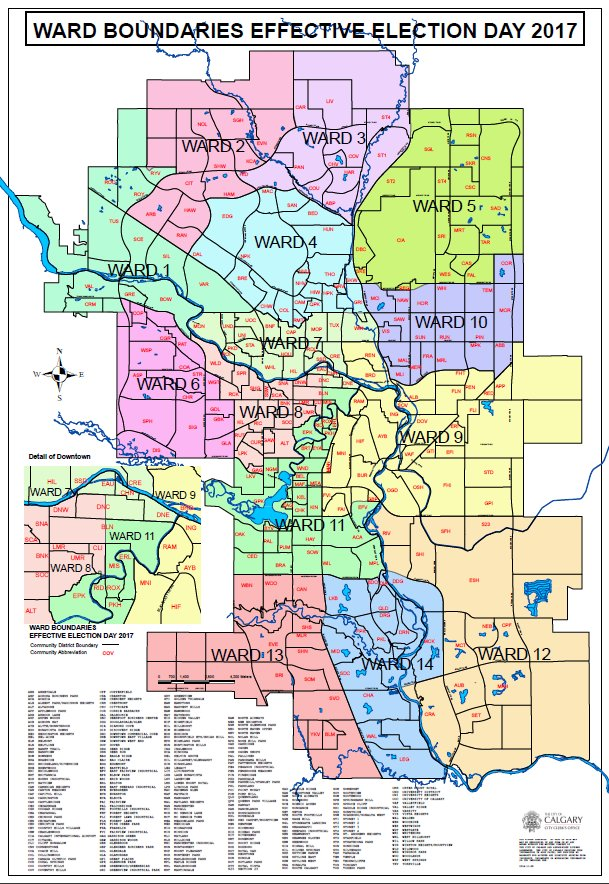

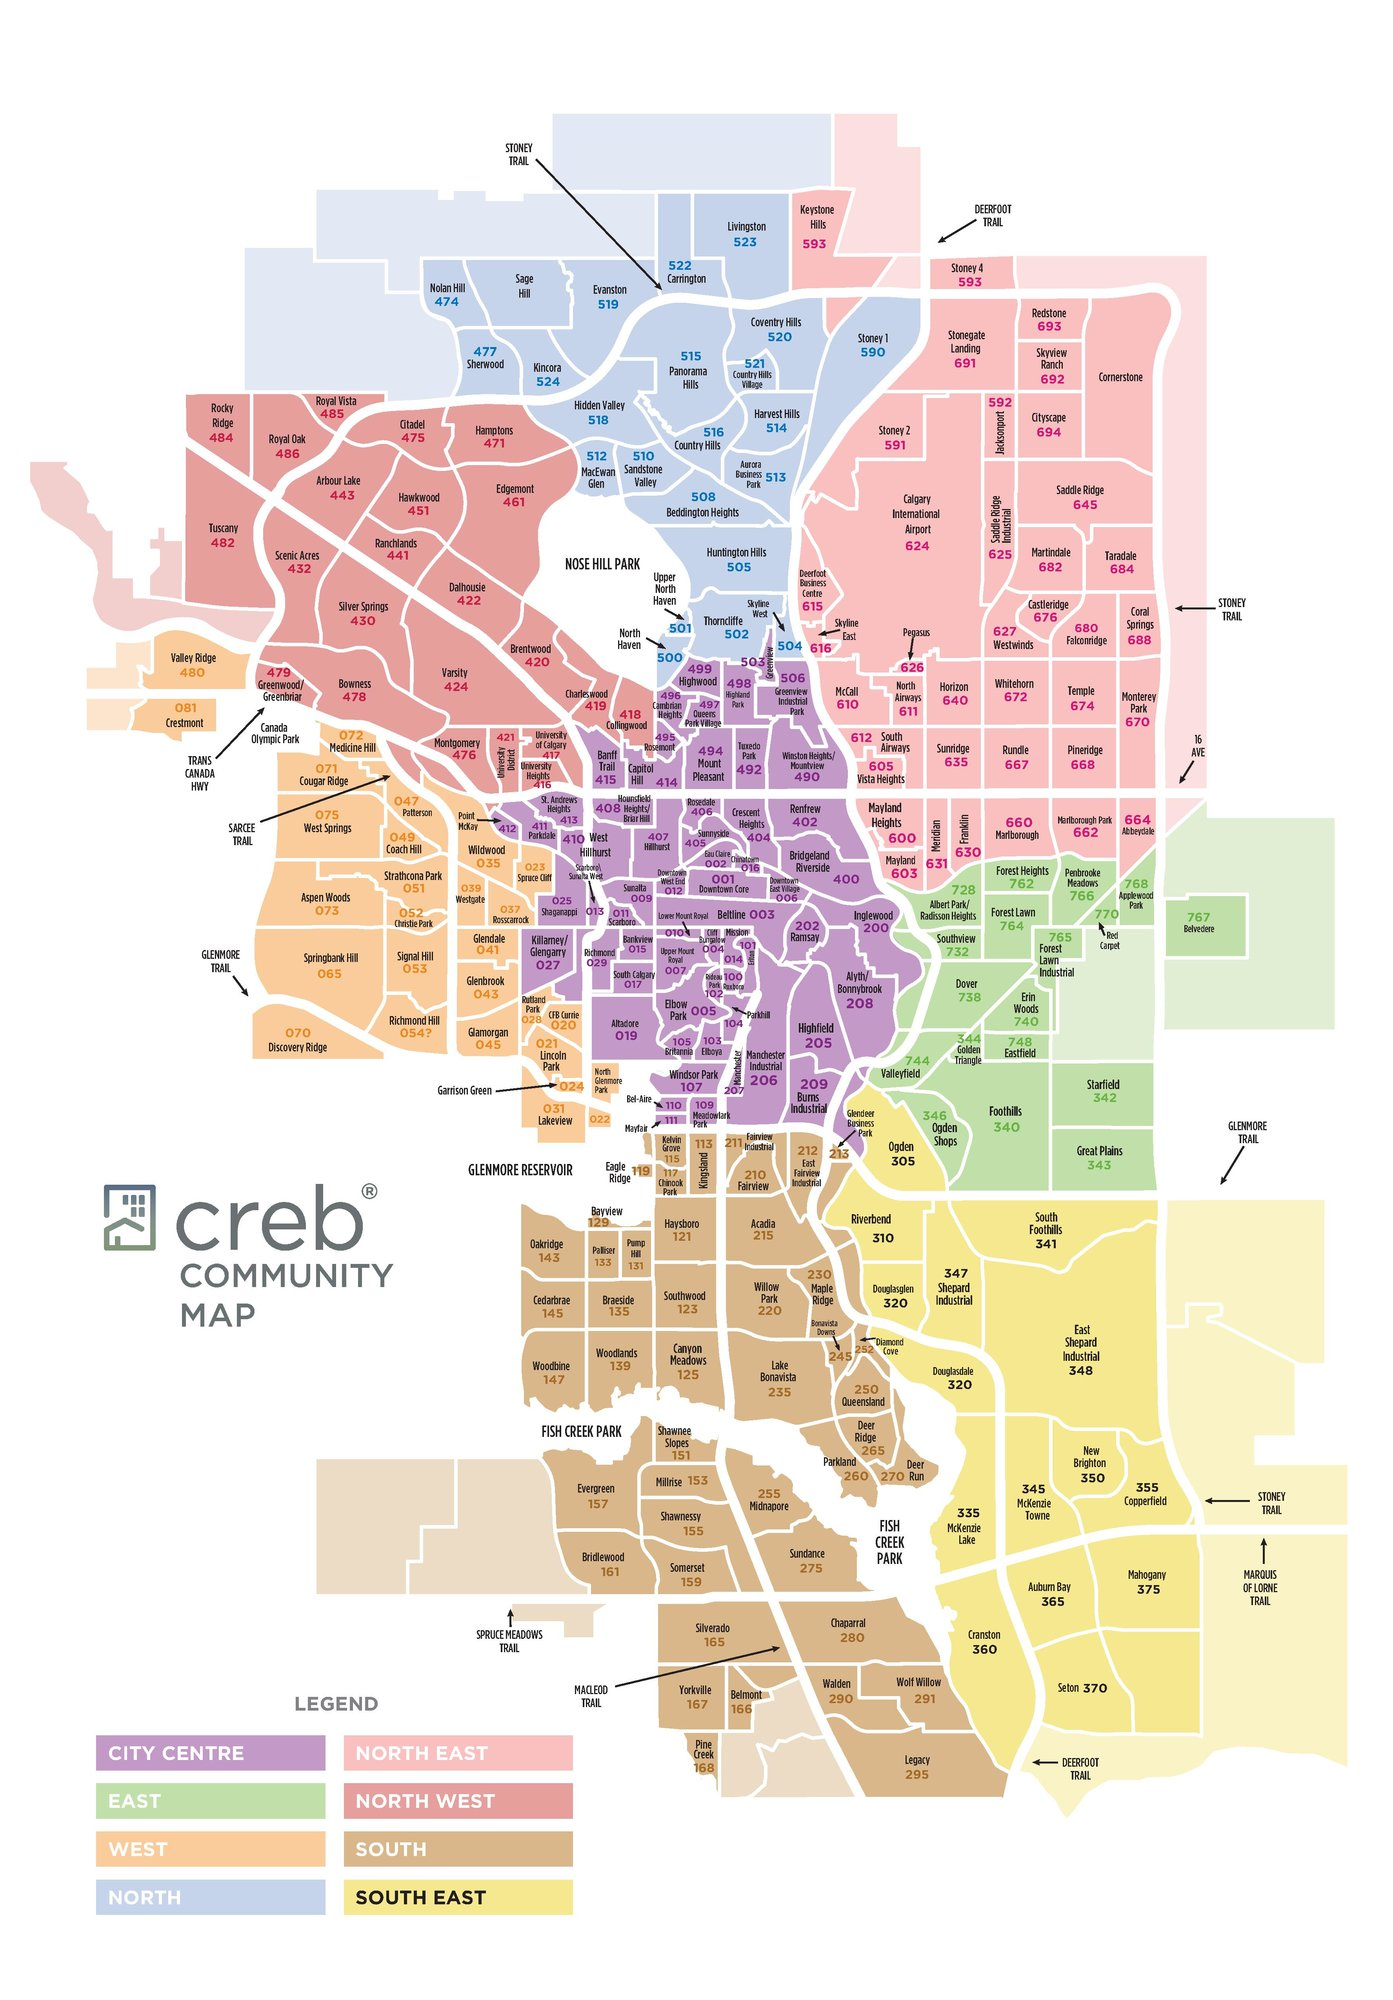

### Which Wards for Which Districts? 

- City Centre: Ward 7, Ward 8
- East: Ward 9
- West: Ward 6
- North: Ward 2, Ward 3, Ward 4
- North East: Ward 5, Ward 10
- North West: Ward 1
- South: Ward 11, Ward 13, Ward 14
- South East: Ward 12

### Sorting the Data by Area

In [9]:
# creating arrays for the areas that have more than 2 wards
cc = [7,8]
north = [2,3,4]
ne = [5,10]
south = [11,13,14]

City Centre

In [10]:
df_city_centre = df_current.loc[df_current['WARD'].isin(cc)]

East

In [11]:
df_east = df_current[df_current['WARD'] == 9]

West

In [12]:
df_west = df_current[df_current['WARD'] == 6]

North

In [13]:
df_north = df_current.loc[df_current['WARD'].isin(north)]

North East

In [14]:
df_north_east = df_current.loc[df_current['WARD'].isin(ne)]

Nort West

In [15]:
df_north_west = df_current[df_current['WARD'] == 1]

South

In [16]:
df_south = df_current.loc[df_current['WARD'].isin(south)]

South East

In [17]:
df_south_east = df_current[df_current['WARD'] == 12]

# We are looking for:
1. Total population for each region for each year
2. Growth Rate by Region By Year
3. Total population over 10 years
4. Average Annual Population Growth by Region
5. Rate of Age distribution by region
6. Age and Gender Distribution as a whole. 

# Total Population for Each Region for Each Year

# City Centre Population By Year

In [18]:
df_city_centre.YEAR.unique()

array([2009, 2011, 2014, 2016, 2019])

In [19]:
df_city_centre['TOTAL'] = df.FEMALES + df.MALES
cc_yat = df_city_centre.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
cc_yt = cc_yat.drop(columns = 'AGE_RANGE')
cc_sum = cc_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
cc_sum.head()

,TOTAL
YEAR,
2009,130074
2011,155723
2014,167598
2016,170625
2019,169474


# East Region Population by Year

In [21]:
df_east['TOTAL'] = df.FEMALES + df.MALES

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_east['TOTAL'] = df.FEMALES + df.MALES
east_yat = df_east.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
east_yt = east_yat.drop(columns = 'AGE_RANGE')
east_sum = east_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
east_sum.head()

,TOTAL
YEAR,
2009,62097
2011,72427
2014,76481
2016,76533
2019,91464


# West Region Population by Year

In [24]:
df_west['TOTAL'] = df.FEMALES + df.MALES
west_yat = df_west.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
west_yt = west_yat.drop(columns = 'AGE_RANGE')
west_sum = west_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
west_sum.head()

,TOTAL
YEAR,
2009,86453
2011,77296
2014,84803
2016,87278
2019,90951


# North Population by Year

In [26]:
df_north['TOTAL'] = df.FEMALES + df.MALES
north_yat = df_north.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
north_yt = north_yat.drop(columns = 'AGE_RANGE')
north_sum = north_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
north_sum.head()

,TOTAL
YEAR,
2009,256864
2011,246743
2014,266117
2016,283866
2019,258704


# North East Region by Population

In [28]:
df_north_east['TOTAL'] = df.FEMALES + df.MALES
ne_yat = df_north_east.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
ne_yt = ne_yat.drop(columns = 'AGE_RANGE')
ne_sum = ne_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
ne_sum.head()

,TOTAL
YEAR,
2009,124626
2011,151512
2014,174932
2016,173292
2019,187936


# North West Region by Population

In [30]:
df_north_west['TOTAL'] = df.FEMALES + df.MALES
nw_yat = df_north_west.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
nw_yt = nw_yat.drop(columns = 'AGE_RANGE')
nw_sum = nw_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
nw_sum.head()

,TOTAL
YEAR,
2009,93437
2011,83125
2014,87605
2016,87565
2019,89050


# Southern Region by Population

In [32]:
df_south['TOTAL'] = df.FEMALES + df.MALES
south_yat = df_south.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
south_yt = south_yat.drop(columns = 'AGE_RANGE')
south_sum = south_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
south_sum.head()

,TOTAL
YEAR,
2009,213414
2011,230694
2014,242725
2016,246628
2019,282855


# South East Region by Population

In [34]:
df_south_east['TOTAL'] = df.FEMALES + df.MALES
se_yat = df_south_east.drop(columns = ['WARD', 'FEMALES', 'MALES', 'OTHER'])
se_yt = se_yat.drop(columns = 'AGE_RANGE')
se_sum = se_yt.groupby('YEAR').sum()

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
se_sum.head()

,TOTAL
YEAR,
2009,98490
2011,73416
2014,94933
2016,109384
2019,109873


In [63]:
df_city_centre = df_current.loc[df_current['WARD'].isin(cc)]

In [20]:
array = ['yellow', 'green']
df.loc[(df['age'] == 21) & df['favorite_color'].isin(array)]

KeyError: 'age'

In [21]:
df_city_centre = df_current[df_current['WARD'] 

SyntaxError: unexpected EOF while parsing (<ipython-input-21-8fe1dbcf0879>, line 1)

In [22]:
df_south_east = df_current[df_current['WARD'] == 12]

In [23]:
df_south_east.head()

,YEAR,WARD,AGE_RANGE,FEMALES,MALES,OTHER
1089,2011,12,0-4,3411,3664,NaN
1090,2011,12,5-14,5137,5286,NaN
1091,2011,12,15-19,1918,2081,NaN
1092,2011,12,20-24,1907,1868,NaN
1093,2011,12,25-34,7952,7552,NaN
